# Importing Libraries

In [3]:
# First we import the necessary python libraries required by us to solve question 2a and 2b
import sqlite3
import pandas as pd
import numpy as np
import json
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
import matplotlib.ticker as ticker

# Setting our working directory

In [2]:
# We check our working directory and set it to the correct path 
print(os.getcwd())

new_directory = '/Users/fahim/Desktop/ST2195/Coursework Python'

# Change the current working directory
os.chdir(new_directory)

# Verify the change
print("New working directory: " + os.getcwd())

/Users/fahim
New working directory: /Users/fahim/Desktop/ST2195/Coursework Python


# Reading our necessary datafiles and writing them to our SQL Database

In [4]:
# Here we use pandas to read the csvs of our necessary files and save it on jupyter. 
# We face a UnicodeDecodeError using the default utf-8 encoding style and hence we have to change it latin1
airports = pd.read_csv("airports.csv")
carriers = pd.read_csv("carriers.csv")
planedata = pd.read_csv("plane-data.csv")
variable_desc = pd.read_csv("variable-descriptions.csv")

Y1999 = pd.read_csv("1999.csv", encoding = "latin1") 
Y2000 = pd.read_csv("2000.csv", encoding = "latin1")  
Y2001 = pd.read_csv("2001.csv", encoding = "latin1")
Y2002 = pd.read_csv("2002.csv", encoding = "latin1") 
Y2003 = pd.read_csv("2003.csv", encoding = "latin1") 
Y2004 = pd.read_csv("2004.csv", encoding = "latin1")
Y2005 = pd.read_csv("2005.csv", encoding = "latin1") 
Y2006 = pd.read_csv("2006.csv", encoding = "latin1") 
Y2007 = pd.read_csv("2007.csv", encoding = "latin1") 
Y2008 = pd.read_csv("2008.csv", encoding = "latin1") 

/var/folders/rq/r05gdyz90tq5pjfxkdz48vzw0000gn/T/ipykernel_992/3097922861.py:12: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  Y2003 = pd.read_csv("2003.csv", encoding = "latin1")


In [5]:
# Here we use .to_sql to create the tables and data from jupyter to SQL
airports.to_sql('airports', con = conn, index = False)
carriers.to_sql('carriers', con = conn, index = False)
planedata.to_sql('planedata', con = conn, index = False)
variable_desc.to_sql('variable-descriptions', con = conn, if_exists = 'append', index = False)

Y1999.to_sql('flights_data', con = conn, if_exists = 'append', index = False)
Y2000.to_sql('flights_data', con = conn, if_exists = 'append', index = False)
Y2001.to_sql('flights_data', con = conn, if_exists = 'append', index = False)
Y2002.to_sql('flights_data', con = conn, if_exists = 'append', index = False)
Y2003.to_sql('flights_data', con = conn, if_exists = 'append', index = False)
Y2004.to_sql('flights_data', con = conn, if_exists = 'append', index = False)
Y2005.to_sql('flights_data', con = conn, if_exists = 'append', index = False)
Y2006.to_sql('flights_data', con = conn, if_exists = 'append', index = False)
Y2007.to_sql('flights_data', con = conn, if_exists = 'append', index = False)
Y2008.to_sql('flights_data', con = conn, if_exists = 'append', index = False)

2389217

In [6]:
# We establish a connection to a SQL database we created 
conn = sqlite3.connect('Coursework_Python.db')
c = conn.cursor()

# Question 2(a)
## What are the best times and days of the week to minimise delays each year? 

In [6]:
# We execute an SQL command to add a new column named 'SignificantDelay' to the 'flights_data' table first
# The new column is of type INTEGER and has a default value of 0
c.execute('''
ALTER TABLE flights_data
ADD COLUMN SignificantDelay INTEGER DEFAULT 0;
''')

# Commit the changes to the database
conn.commit()

In [7]:
# Execute an SQL command to update the 'SignificantDelay' column in the 'flights_data' table
# The 'SignificantDelay' column is updated based on a binary condition
# If either the 'ArrDelay' or 'DepDelay' is greater than 15 minutes, set 'SignificantDelay' to 1, otherwise set it to 0
# This facilitates extracting data from our database moving foward
c.execute('''
UPDATE flights_data
SET SignificantDelay = CASE 
    WHEN ArrDelay > 15 OR DepDelay > 15 THEN 1
    ELSE 0
END;
''')

# Commit the changes to the database
conn.commit()


In [7]:
# Here we define an SQL query to select data from the 'flights_data' table
# The query calculates the total count of delays , average arrival delay, average departure delay, and average total delay by year and day of the week
# It filters the data to include only non-cancelled, non-diverted flights with significant delays
# The results are grouped by year and day of the week and sorted accordingly
bestdays = '''
SELECT Year, 
       DayOfWeek, 
       COUNT(*) AS TotalDelays,
       AVG(ArrDelay) AS AvgArrDelay,  
       AVG(DepDelay) AS AvgDepDelay,  
       (AVG(ArrDelay) + AVG(DepDelay)) / 2 AS AvgTotalDelay
FROM flights_data
WHERE Cancelled = 0 AND Diverted = 0 AND SignificantDelay = 1  
GROUP BY Year, DayOfWeek
ORDER BY Year, DayOfWeek;      
'''

# Execute the SQL query and read the results into a DataFrame
bestdays_df = pd.read_sql_query(bestdays, conn)

# Print the DataFrame containing the results of the SQL query
print(bestdays_df)


    Year  DayOfWeek  TotalDelays  AvgArrDelay  AvgDepDelay  AvgTotalDelay
0   1999          1       174854    48.073753    41.306673      44.690213
1   1999          2       161556    45.661944    37.874489      41.768217
2   1999          3       175807    46.742502    38.492961      42.617731
3   1999          4       195865    48.020376    40.163087      44.091732
4   1999          5       214748    49.454542    42.678875      46.066708
..   ...        ...          ...          ...          ...            ...
65  2008          3        86028    49.438567    44.534884      46.986725
66  2008          4        94341    49.697767    43.387742      46.542754
67  2008          5       111338    53.468861    46.907471      50.188166
68  2008          6        69795    50.231678    45.560742      47.896210
69  2008          7        89579    50.458322    45.871108      48.164715

[70 rows x 6 columns]


In [8]:
# We a dictionary to map numerical representations of days of the week to their corresponding names for the week
day_mapping = {
    1: 'Mon',
    2: 'Tues',
    3: 'Wed',
    4: 'Thurs',
    5: 'Fri',
    6: 'Sat',
    7: 'Sun'
}

# Apply the day_mapping to the 'DayOfWeek' column in the bestdays_df DataFrame
# Convert the 'Year' column to string type
bestdays_df['DayOfWeek'] = bestdays_df['DayOfWeek'].map(day_mapping)
bestdays_df['Year'] = bestdays_df['Year'].astype(str)

# We view the modified bestdays_df DataFrame
bestdays_df.head()


   Year DayOfWeek  TotalDelays  AvgArrDelay  AvgDepDelay  AvgTotalDelay
0  1999       Mon       174854    48.073753    41.306673      44.690213
1  1999      Tues       161556    45.661944    37.874489      41.768217
2  1999       Wed       175807    46.742502    38.492961      42.617731
3  1999     Thurs       195865    48.020376    40.163087      44.091732
4  1999       Fri       214748    49.454542    42.678875      46.066708


In [14]:
bestdays_df.head()

,Year,DayOfWeek,TotalDelays,AvgArrDelay,AvgDepDelay,AvgTotalDelay
0,1999,Mon,174854,48.073753,41.306673,44.690213
1,1999,Tues,161556,45.661944,37.874489,41.768217
2,1999,Wed,175807,46.742502,38.492961,42.617731
3,1999,Thurs,195865,48.020376,40.163087,44.091732
4,1999,Fri,214748,49.454542,42.678875,46.066708


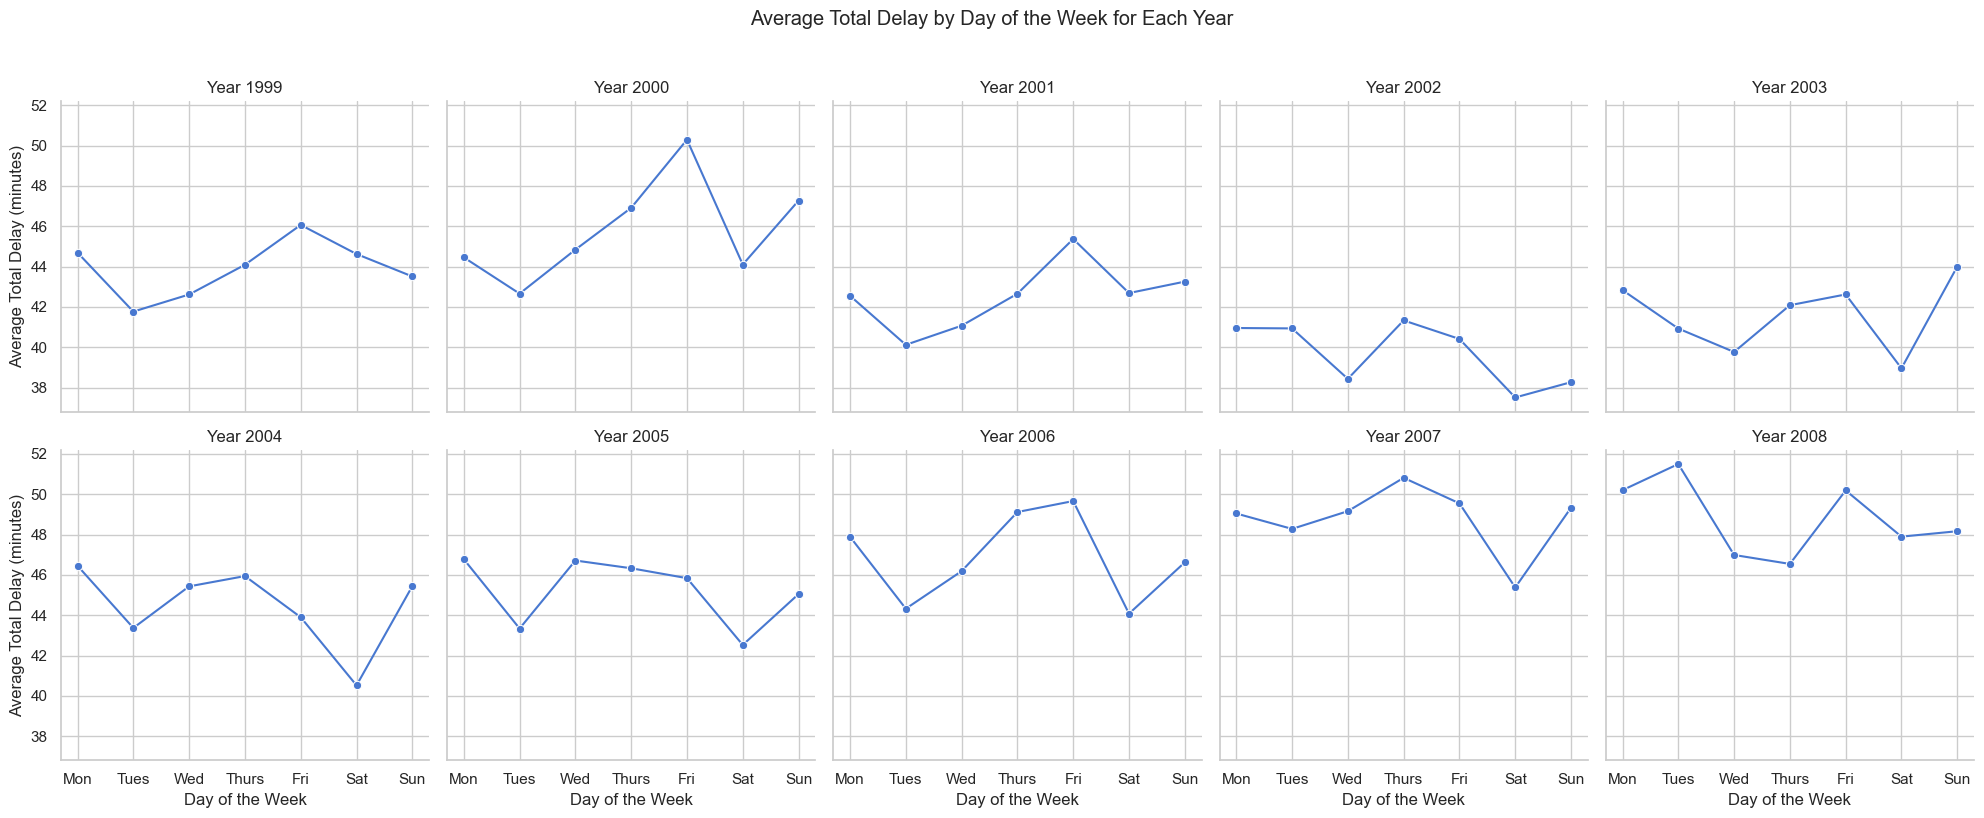

In [71]:
# Set the style of the plot
sns.set_style("whitegrid")

# Create a FacetGrid with seaborn to plot separate graphs for each year
g = sns.FacetGrid(bestdays_df, col="Year", col_wrap=5, height=4)

# Map a line plot of AvgTotalDelay for each day of the week across the years
g.map(sns.lineplot, "DayOfWeek", "AvgTotalDelay", marker='o')

# Set titles for each subplot
g.set_titles("Year {col_name}")

# Set labels for axes and the overall title
g.set_axis_labels("Day of the Week", "Average Total Delay (minutes)")
g.fig.suptitle("Average Total Delay by Day of the Week for Each Year", y=1.02)

# Adjust spacing between subplots
plt.tight_layout()
# Save the plot as an image file
plt.savefig("average_delay_by_day_of_week.png", dpi=300)

# Show the plot
plt.show()

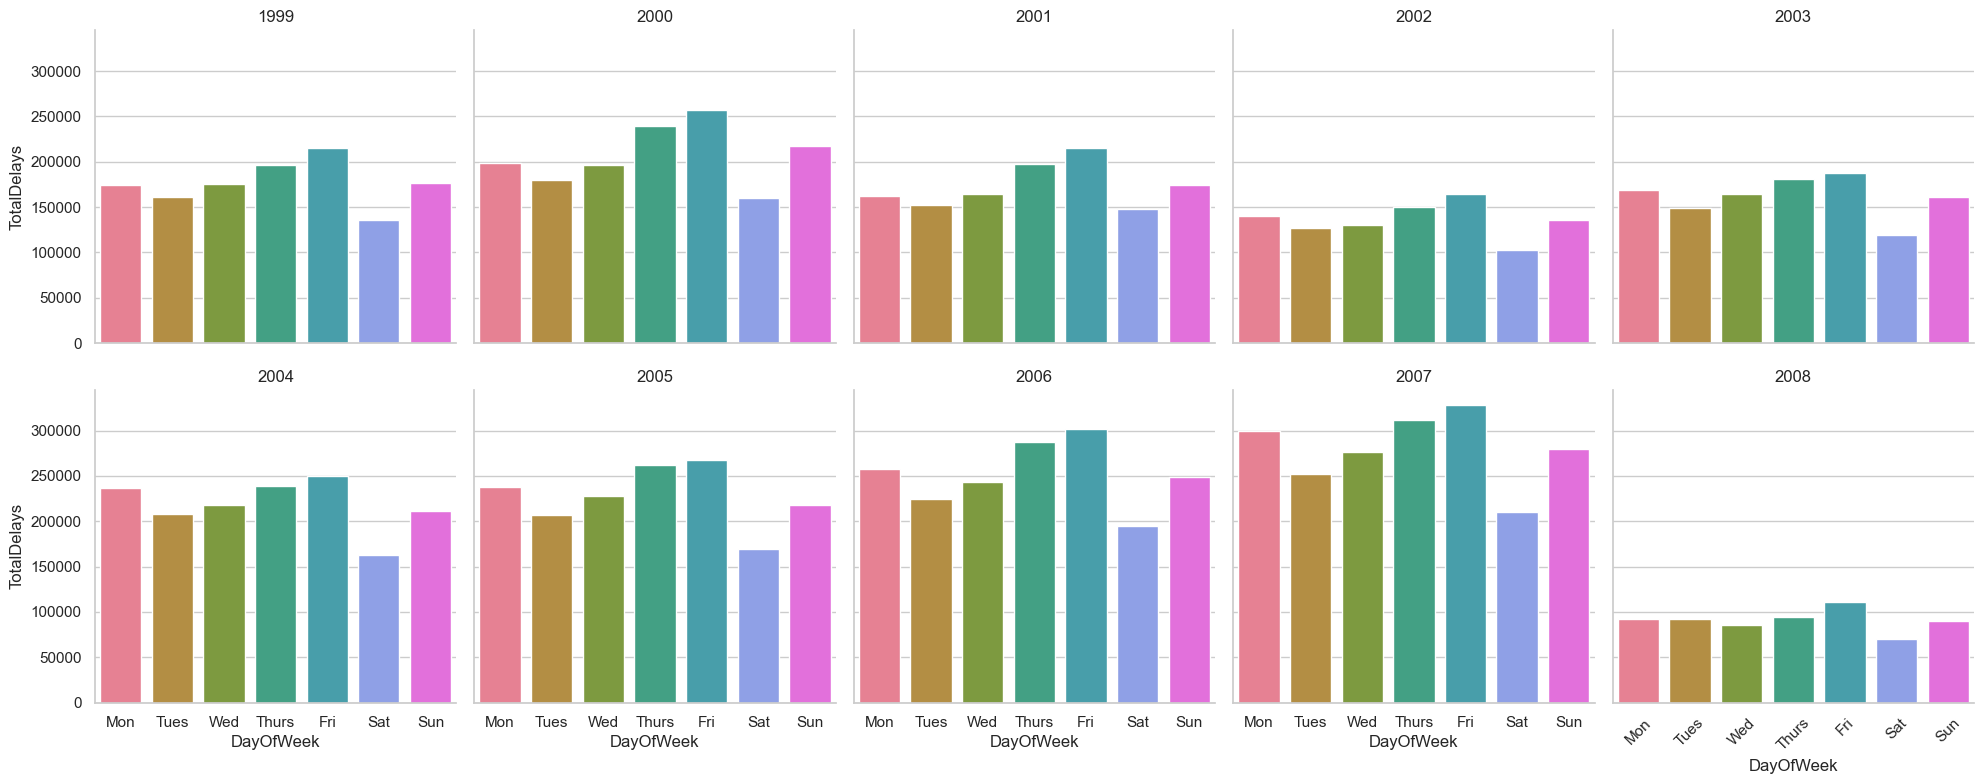

In [70]:
# Convert 'Year' column to string for proper plotting
bestdays_df['Year'] = bestdays_df['Year'].astype(str)
# Define the order of days of the week to ensure consistent ordering in the plot
days_order = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']

sns.set_style("whitegrid")

# Create a FacetGrid with seaborn
g = sns.FacetGrid(bestdays_df, col='Year', col_wrap=5, height=4)

# Set a color palette for the plot
palette = sns.color_palette("husl", 7)

# Map a bar plot to TotalDelays for each year
g.map(sns.barplot, 'DayOfWeek', 'TotalDelays', order=['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'], palette=palette)

# Set the titles for each subplot
g.set_titles("{col_name}")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust spacing between subplots
plt.tight_layout()

# Save the plot
plt.savefig("total_delays_by_day_of_week_facetgrid4.png",dpi=300)





In [22]:
# SQL query to retrieve data about flight delays categorized by time of day
# The query calculates the count of delays, average arrival delay, average departure delay, and average total delay
# It categorizes departure times into different time periods (Early Morning, Morning, Noon, Evening, Night, Late Night)
# The data is grouped by year and time of day
# Only non-cancelled, non-diverted flights with significant delays are considered
# The results are ordered by year and time of day

besttimes = """
SELECT
  Year,
  (CASE
    WHEN CRSDeptime BETWEEN 0501 AND 0900 THEN 'Early Morning'
    WHEN CRSDeptime BETWEEN 0901 AND 1200 THEN 'Morning'
    WHEN CRSDeptime BETWEEN 1201 AND 1700 THEN 'Noon'
    WHEN CRSDeptime BETWEEN 1701 AND 1900 THEN 'Evening'
    WHEN CRSDeptime BETWEEN 1901 AND 2400 THEN 'Night'
    WHEN CRSDeptime BETWEEN 0000 AND 0500 THEN 'Late Night'
    ELSE NULL  -- Set undefined times to NULL
  END) AS TimeOfDay,
  COUNT(*) AS TotalDelays,
  AVG(ArrDelay) AS AvgArrDelay,
  AVG(DepDelay) AS AvgDepDelay,
  (AVG(ArrDelay) + AVG(DepDelay)) / 2 AS AvgTotalDelay
FROM flights_data  
WHERE Cancelled = 0 AND Diverted = 0 AND SignificantDelay = 1
GROUP BY Year, TimeOfDay
HAVING TimeOfDay IS NOT NULL 
ORDER BY Year, TimeOfDay;
"""

besttimes_df = pd.read_sql_query(besttimes, conn)
besttimes_df.head()

,Year,TimeOfDay,TotalDelays,AvgArrDelay,AvgDepDelay,AvgTotalDelay
0,1999,Early Morning,145501,41.787431,30.399922,36.093676
1,1999,Evening,209832,52.093546,45.945576,49.019561
2,1999,Late Night,51977,51.268677,43.064894,47.166785
3,1999,Morning,183466,41.214585,33.696074,37.455330
4,1999,Night,245178,50.349929,48.834218,49.592074


In [23]:
# We notice that the timings of the day are not in the desired order
# Hence we add in this code to structure it to follow the chronological order
time_of_day_order = ['Early Morning', 'Morning', 'Noon', 'Evening', 'Night', 'Late Night']

In [24]:
# Convert the 'TimeOfDay' column to a categorical variable with specified order
besttimes_df['TimeOfDay'] = pd.Categorical(besttimes_df['TimeOfDay'], 
                                           categories=time_of_day_order,  # Specify the desired order of categories
                                           ordered=True)  # Indicate that the categories have an inherent order
# Sort the dataframe by 'Year' first and then 'TimeOfDay'
besttimes_df = besttimes_df.sort_values(by=['Year', 'TimeOfDay'])


# It should now return 'TimeOfDay' in order , but we notice our indexing is wrong 
besttimes_df.head()

,Year,TimeOfDay,TotalDelays,AvgArrDelay,AvgDepDelay,AvgTotalDelay
0,1999,Early Morning,145501,41.787431,30.399922,36.093676
3,1999,Morning,183466,41.214585,33.696074,37.455330
5,1999,Noon,398779,47.358234,39.333746,43.345990
1,1999,Evening,209832,52.093546,45.945576,49.019561
4,1999,Night,245178,50.349929,48.834218,49.592074


In [25]:
# Sort the dataframe by 'Year' first and then 'TimeOfDay'
besttimes_df = besttimes_df.sort_values(by=['Year', 'TimeOfDay'])

# Reset the index
besttimes_df = besttimes_df.reset_index(drop=True)

# It now returns in order
besttimes_df.head()


,Year,TimeOfDay,TotalDelays,AvgArrDelay,AvgDepDelay,AvgTotalDelay
0,1999,Early Morning,145501,41.787431,30.399922,36.093676
1,1999,Morning,183466,41.214585,33.696074,37.455330
2,1999,Noon,398779,47.358234,39.333746,43.345990
3,1999,Evening,209832,52.093546,45.945576,49.019561
4,1999,Night,245178,50.349929,48.834218,49.592074


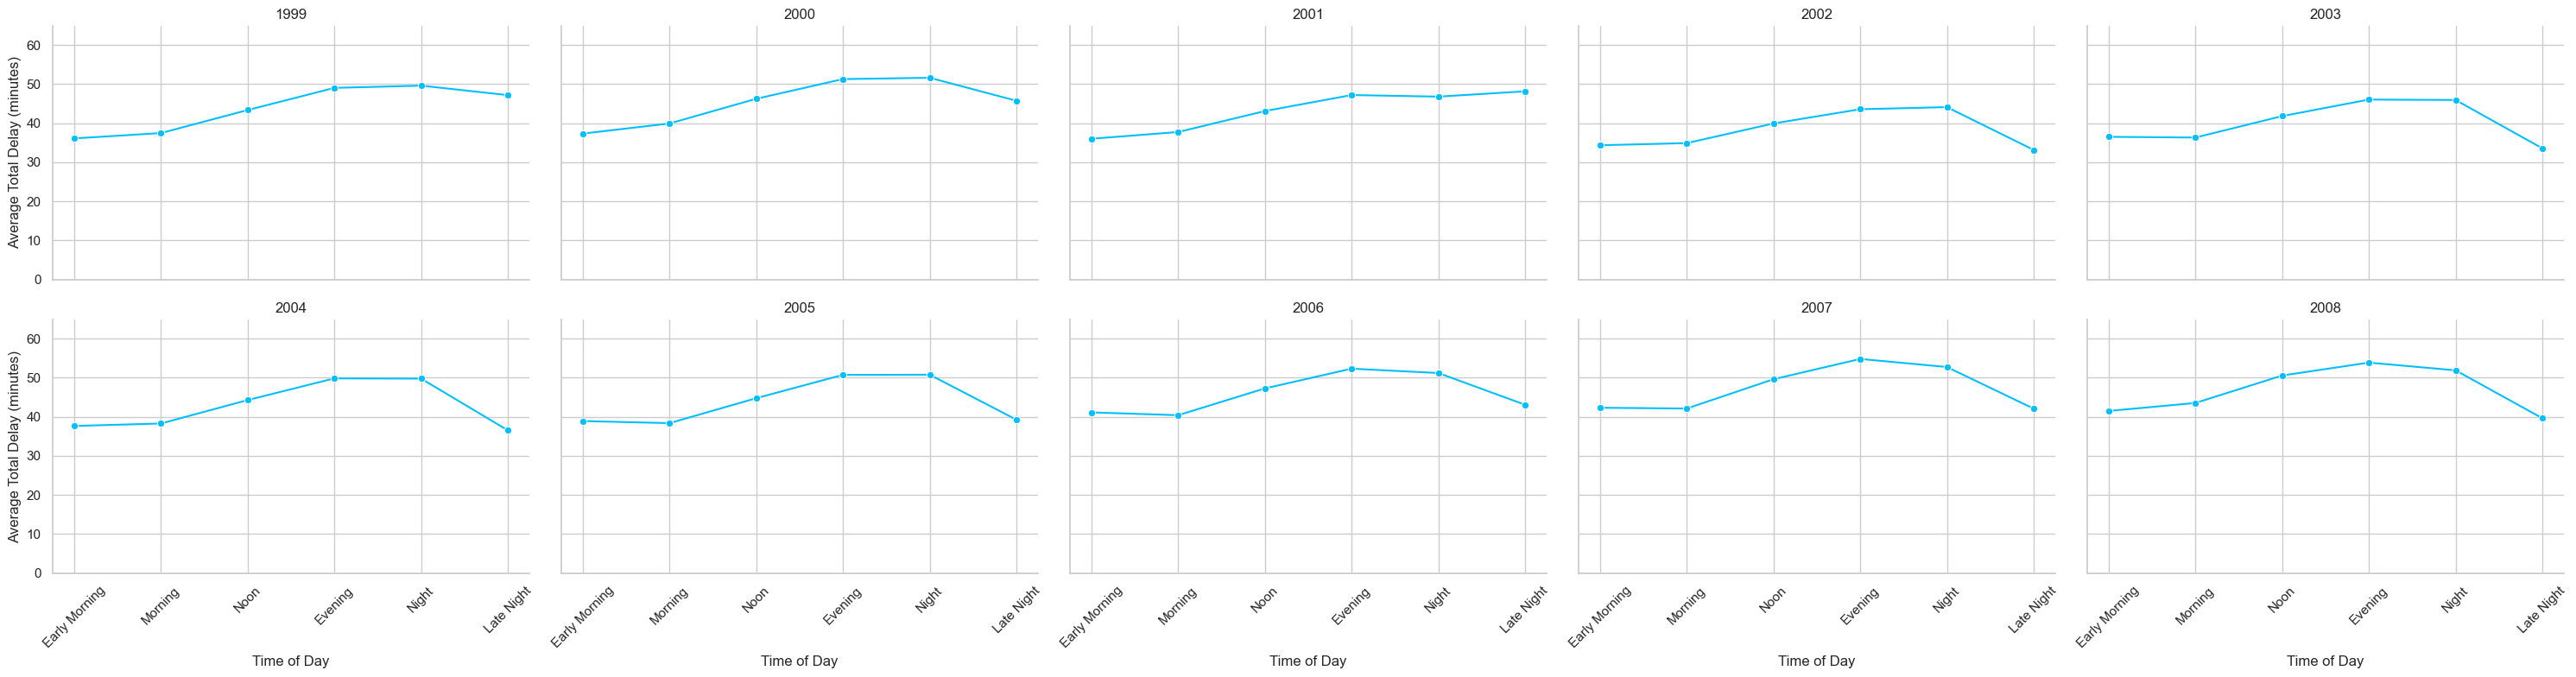

In [72]:
sns.set_style("whitegrid")

# Create a FacetGrid with seaborn to plot separate graphs for each year
g = sns.FacetGrid(besttimes_df, col="Year", col_wrap=5, height=4, aspect=1.5)

# Map a line plot of AvgTotalDelay for each time of day across the years
g.map(sns.lineplot, "TimeOfDay", "AvgTotalDelay", marker='o', color="deepskyblue")

# Set the y-axis limits to ensure consistent scaling across subplots
g.set(ylim=(0, besttimes_df['AvgTotalDelay'].max() + 10))

# Rotate the x-axis labels for clarity
for ax in g.axes:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

# Adjust the subplot parameters to fit the axis labels and prevent overlap
g.fig.tight_layout()

# Set the axis labels and titles
g.set_axis_labels("Time of Day", "Average Total Delay (minutes)")
g.set_titles("{col_name}")

# Save the plot as an image file
plt.savefig("average_delay_by_time_of_day4.png", dpi=300)

# Show the plot
plt.show()

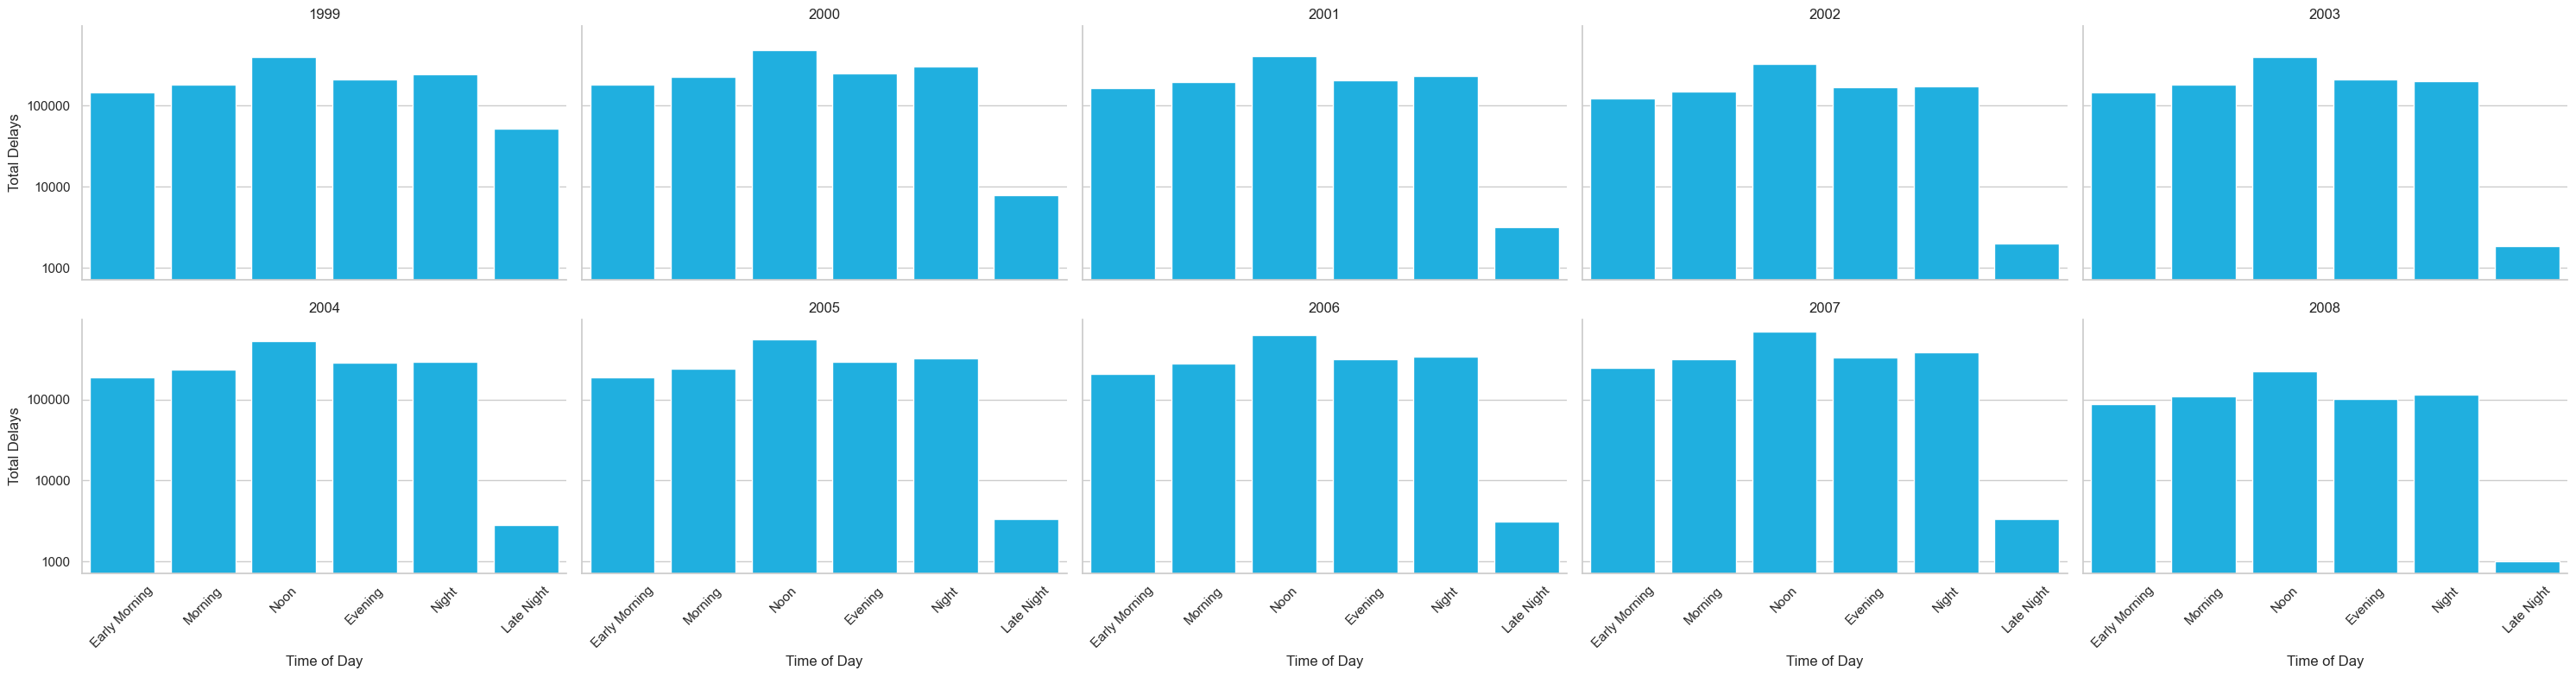

In [73]:
# Set the style of the plot
sns.set_style("whitegrid")

# Define the order of time of day categories for the bar plot
time_of_day_order = [
    'Early Morning', 'Morning', 'Noon', 'Evening', 'Night', 'Late Night'
]

# Create a FacetGrid with seaborn to plot separate graphs for each year
g = sns.FacetGrid(besttimes_df, col="Year", col_wrap=5, height=4, aspect=1.5)

# Map a bar plot of TotalDelays for each time of day across the years
g.map(sns.barplot, "TimeOfDay", "TotalDelays", color="deepskyblue", order=time_of_day_order)

# Rotate the x-axis labels for clarity
for ax in g.axes:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

# Adjust the subplot parameters to fit the axis labels and prevent overlap
g.fig.tight_layout()

# Set the axis labels and titles
g.set_axis_labels("Time of Day", "Total Delays")
g.set_titles("{col_name}")

# Set y-axis scale to logarithmic
for ax in g.axes.flat:
    ax.set_yscale('log')
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))

    
# Save the plot as an image file
plt.savefig("total_delays_by_time_of_day6.png",dpi=300)

# Show the plot
plt.show()



# Qn 2b. Evaluate whether older planes suffer more delays on a year-to-year basis.


In [29]:
# SQL query to retrieve data about flight delays and plane age
# The query calculates the average arrival delay, average departure delay, and average total delay
# It also calculates the age of the plane by subtracting the manufacturing year of the plane from the flight year
# The data is retrieved by joining the flights_data table (f) with the planedata table (p) on the TailNum column
# Only non-cancelled, non-diverted flights with significant delays are considered
# The results are grouped by flight year and manufacturing year of the plane

qn2b = """
SELECT
    f.Year AS FlightYear,
    f.TailNum,
    p.Year AS ManufacturingYear,
    AVG(ArrDelay) AS AvgArrDelay,
    AVG(DepDelay) AS AvgDepDelay,
    (AVG(ArrDelay) + AVG(DepDelay)) / 2 AS AvgTotalDelay,
    (f.Year - p.Year) as PlaneAge
FROM
    flights_data f
JOIN
    planedata p ON f.TailNum = p.tailnum
WHERE
    f.Cancelled = 0 AND f.Diverted = 0 AND f.SignificantDelay=1
GROUP BY
    f.Year, p.Year
"""

qn2b_df = pd.read_sql_query(qn2b, conn)
qn2b_df.head()

,FlightYear,TailNum,ManufacturingYear,AvgArrDelay,AvgDepDelay,AvgTotalDelay,PlaneAge
0,1999,N5CFAA,None,49.205871,39.802230,44.504051,NaN
1,1999,N381AA,1956,47.916667,40.333333,44.125000,43.0
2,1999,N567AA,1959,50.947748,39.389189,45.168468,40.0
3,1999,N421AA,1962,52.160991,37.089783,44.625387,37.0
4,1999,N575AA,1963,46.996970,37.912121,42.454545,36.0


In [30]:
# Dropping rows with null values
qn2b_df.dropna(inplace=True)

# Convert columns to numeric and coerce errors to NaN for anomaly detection
qn2b_df['ManufacturingYear'] = pd.to_numeric(qn2b_df['ManufacturingYear'], errors='coerce')
qn2b_df['FlightYear'] = pd.to_numeric(qn2b_df['FlightYear'], errors='coerce')

# Filter out rows with negative PlaneAge values
qn2b_df = qn2b_df[qn2b_df['FlightYear'] >= qn2b_df['ManufacturingYear']]

# Filter out rows with PlaneAge that is too high due to ManufacturingYear being missing 
qn2b_df = qn2b_df[qn2b_df['FlightYear'] - qn2b_df['ManufacturingYear'] <= 100]

# Recalculate PlaneAge to ensure consistency
qn2b_df['PlaneAge'] = qn2b_df['FlightYear'] - qn2b_df['ManufacturingYear']

# Now df_delays should have no null values and no negative or excessively high PlaneAge values
qn2b_df.head()

,FlightYear,TailNum,ManufacturingYear,AvgArrDelay,AvgDepDelay,AvgTotalDelay,PlaneAge
1,1999,N381AA,1956.0,47.916667,40.333333,44.125000,43.0
2,1999,N567AA,1959.0,50.947748,39.389189,45.168468,40.0
3,1999,N421AA,1962.0,52.160991,37.089783,44.625387,37.0
4,1999,N575AA,1963.0,46.996970,37.912121,42.454545,36.0
5,1999,N550AA,1964.0,54.418118,45.358885,49.888502,35.0


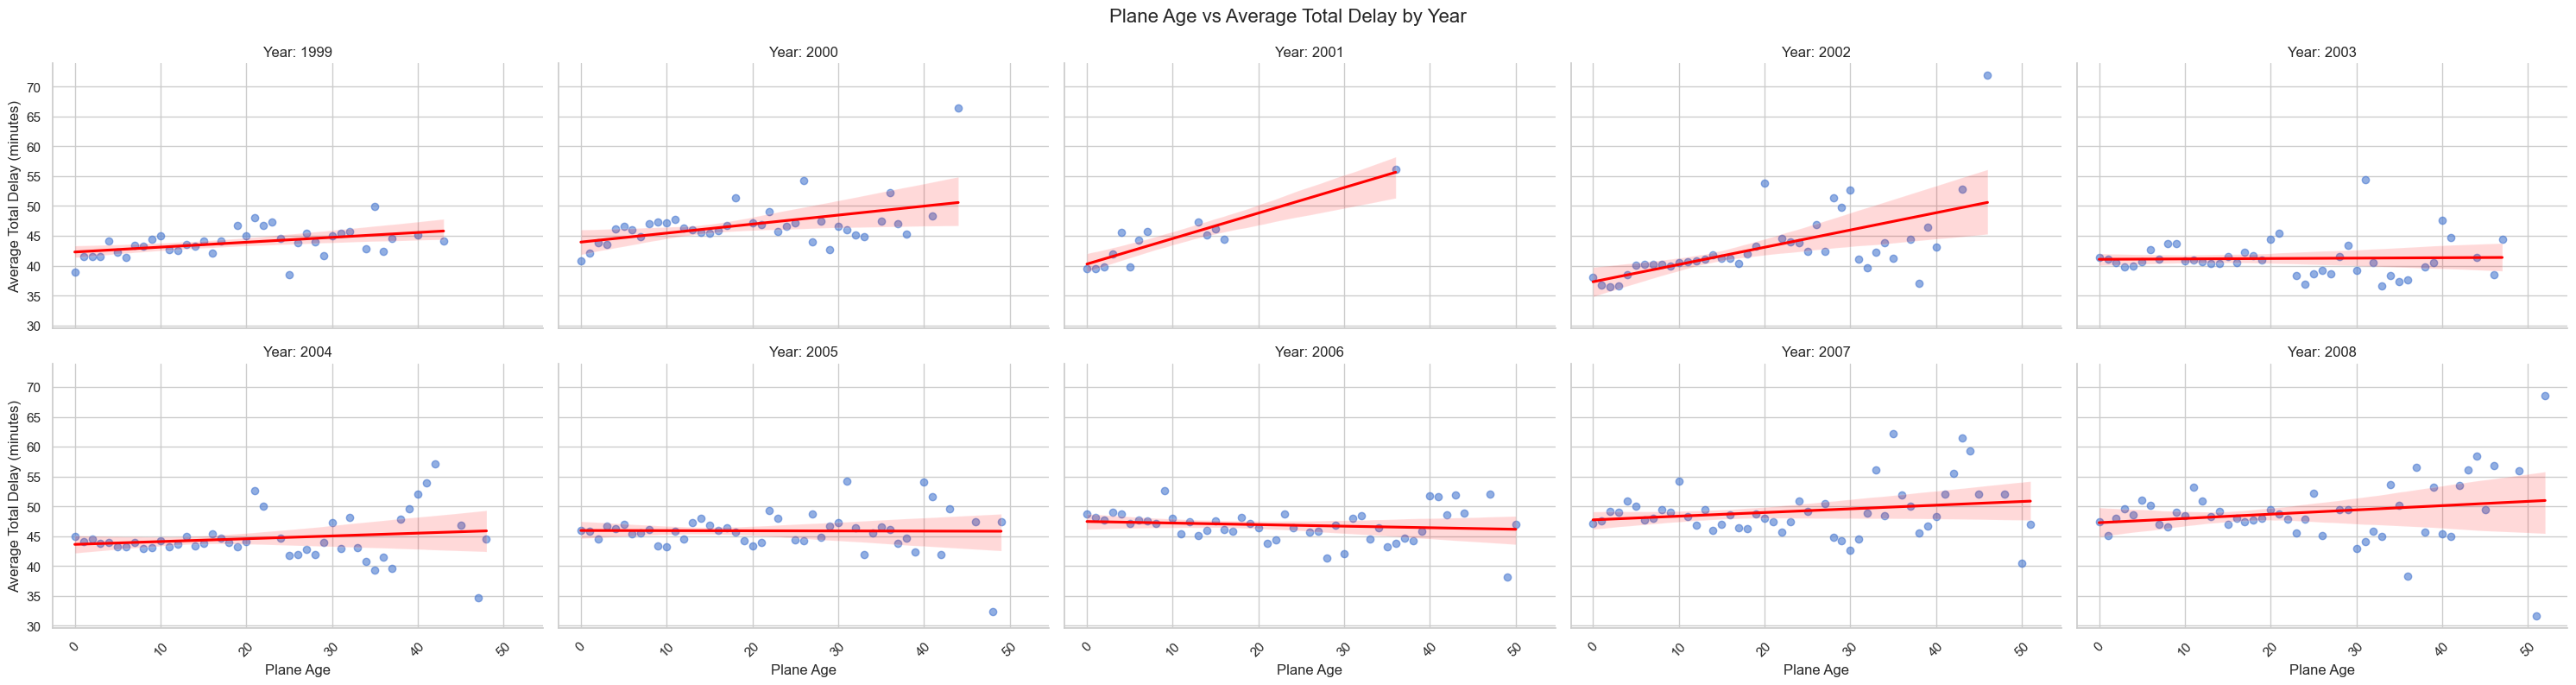

<Figure size 640x480 with 0 Axes>

In [75]:
qn2b_df['FlightYear'] = pd.to_numeric(qn2b_df['FlightYear'])
qn2b_df['PlaneAge'] = pd.to_numeric(qn2b_df['PlaneAge'])
qn2b_df['AvgTotalDelay'] = pd.to_numeric(qn2b_df['AvgTotalDelay'])

# Setting the aesthetic style of the plots
sns.set(style="whitegrid", palette="muted")

# Create a FacetGrid to plot data points for each year separately
g = sns.FacetGrid(qn2b_df, col="FlightYear", col_wrap=5, height=4, aspect=1.5)
g.map(sns.regplot, "PlaneAge", "AvgTotalDelay", scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})

# Enhance each plot
g.set_titles("Year: {col_name}")
g.set_axis_labels("Plane Age", "Average Total Delay (minutes)")

# Adjust the layout to make sure everything fits without overlap
g.fig.subplots_adjust(top=0.9)  # Adjust the top space to accommodate title
g.fig.suptitle('Plane Age vs Average Total Delay by Year', size=16)

# Rotate x-axis labels for better readability if needed
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

# Finally, render the plots
plt.show()
plt.savefig("PlaneAge2.png", dpi = 300)

# Qn 2c

In [38]:
#importing the packages that will be used for q5 machine learning 
#machine learning
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline 

In [40]:
all_years_data = pd.DataFrame()

for year in range(1999, 2009):  # Loop from 1999 to 2008
    # Define the SQL query within the loop, changing the year in each iteration
    query_2c = f"""
    SELECT 
      Year, Month, DayofMonth, DayOfWeek, CRSDepTime, CRSArrTime, 
      Distance, UniqueCarrier, Diverted, 
      origin.lat AS OriginLatitude, origin.long AS OriginLongitude,
      dest.lat AS DestLatitude, dest.long AS DestLongitude
    FROM flights_data
    INNER JOIN airports origin ON flights_data.Origin = origin.IATA  
    INNER JOIN airports dest ON flights_data.Dest = dest.IATA 
    INNER JOIN carriers c ON flights_data.UniqueCarrier = c.Code
    WHERE Year = {year} AND Diverted IS NOT NULL;
"""
    year_data = pd.read_sql_query(query_2c, conn)
    all_years_data = pd.concat([all_years_data, year_data], ignore_index=True)

# Now all_years_data contains the data from 1999 to 2008
print(all_years_data.head())

   Year  Month  DayofMonth  DayOfWeek  CRSDepTime  CRSArrTime  Distance  \
0  1999      1          27          3        1908        2005       198   
1  1999      1          28          4        1908        2005       198   
2  1999      1          29          5        1908        2005       198   
3  1999      1          31          7        1908        2005       198   
4  1999      1           1          5        1535        1645       257   

  UniqueCarrier  Diverted  OriginLatitude  OriginLongitude  DestLatitude  \
0            US         0       37.505167       -77.319667     39.871953   
1            US         0       37.505167       -77.319667     39.871953   
2            US         0       37.505167       -77.319667     39.871953   
3            US         0       37.505167       -77.319667     39.871953   
4            US         0       43.118866       -77.672384     39.871953   

   DestLongitude  
0     -75.241141  
1     -75.241141  
2     -75.241141  
3     -75.241141

In [41]:
# We use .head() to get a general sense of how our dataframe looks like
all_years_data.head()

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,Distance,UniqueCarrier,Diverted,OriginLatitude,OriginLongitude,DestLatitude,DestLongitude
0,1999,1,27,3,1908,2005,198,US,0,37.505167,-77.319667,39.871953,-75.241141
1,1999,1,28,4,1908,2005,198,US,0,37.505167,-77.319667,39.871953,-75.241141
2,1999,1,29,5,1908,2005,198,US,0,37.505167,-77.319667,39.871953,-75.241141
3,1999,1,31,7,1908,2005,198,US,0,37.505167,-77.319667,39.871953,-75.241141
4,1999,1,1,5,1535,1645,257,US,0,43.118866,-77.672384,39.871953,-75.241141


In [42]:
# We see the respective datatypes of our columns to help facilitate preprocessing our logistic regression model later on
all_years_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60192829 entries, 0 to 60192828
Data columns (total 13 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Year             int64  
 1   Month            int64  
 2   DayofMonth       int64  
 3   DayOfWeek        int64  
 4   CRSDepTime       int64  
 5   CRSArrTime       int64  
 6   Distance         int64  
 7   UniqueCarrier    object 
 8   Diverted         int64  
 9   OriginLatitude   float64
 10  OriginLongitude  float64
 11  DestLatitude     float64
 12  DestLongitude    float64
dtypes: float64(4), int64(8), object(1)
memory usage: 5.8+ GB


In [43]:
# We check for any null values that might interfere with our logistic regression modelling
# We note that we do not have any null values in our columns
all_years_data.isnull().sum()

Year               0
Month              0
DayofMonth         0
DayOfWeek          0
CRSDepTime         0
CRSArrTime         0
Distance           0
UniqueCarrier      0
Diverted           0
OriginLatitude     0
OriginLongitude    0
DestLatitude       0
DestLongitude      0
dtype: int64

In [44]:
# We take a look at the classes of our target variable
# We note that our classes are significantly imbalanced and this might lead to issues moving forward
all_years_data['Diverted'].value_counts()

0    60065543
1      127286
Name: Diverted, dtype: int64

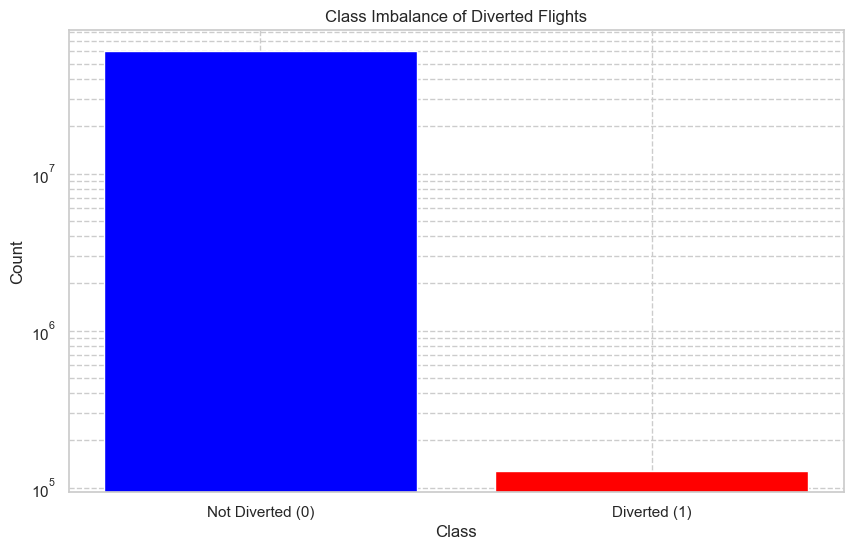

<Figure size 800x600 with 0 Axes>

In [47]:
# We define the classes and their respective counts
classes = ['Not Diverted (0)', 'Diverted (1)']
counts = [60065543, 127286]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(classes, counts, color=['blue', 'red'])
plt.title('Class Imbalance of Diverted Flights')
plt.xlabel('Class')
plt.ylabel('Count')
plt.yscale('log')  # Logarithmic scale for better visibility of class imbalance
plt.grid(True, which="both", ls="--")
# Save the chart to a file
plt.savefig('Class_Imbalance_Diverted_Flights2.png', dpi= 300)

# Display the chart
plt.show()

/var/folders/rq/r05gdyz90tq5pjfxkdz48vzw0000gn/T/ipykernel_12927/2234971211.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  initial_heatmap = sns.heatmap(all_years_data.corr(), annot = True)


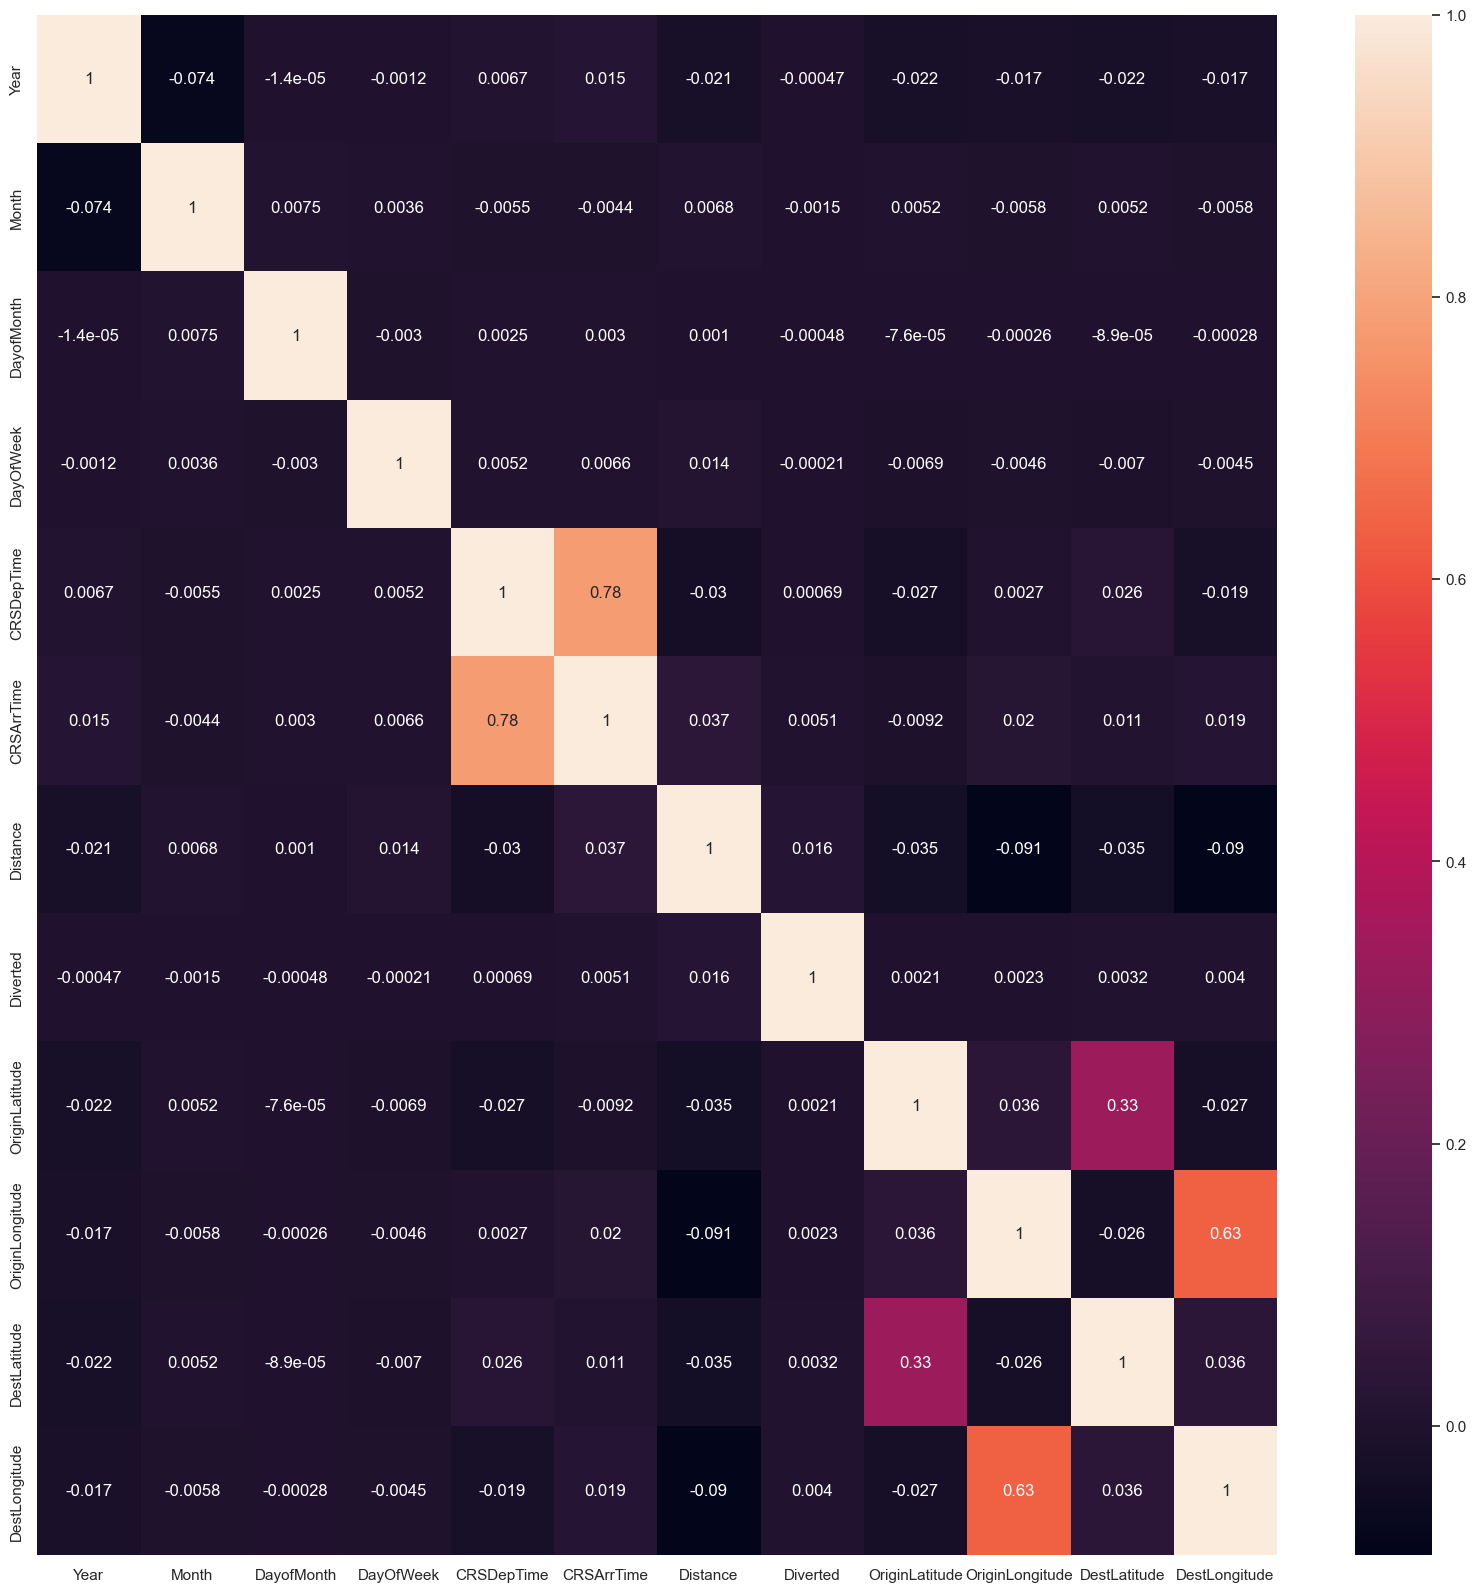

In [49]:
# We do up an initial heatmap to see if there is any correlation between 'Diverted' and the features
fig,(ax) = plt.subplots(1, figsize = (20,20))
initial_heatmap = sns.heatmap(all_years_data.corr(), annot = True)
# We note that the features have low correlation to 'Diverted'

In [50]:
# We create separate the data from all_years_data into their respective years 
data_by_year = {}
for year in range(1999, 2009):
    data_by_year[year] = all_years_data[all_years_data['Year'] == year].copy()

# We can now access each year's data 

data_1999 = data_by_year[1999]
data_2000 = data_by_year[2000]
data_2001 = data_by_year[2001]
data_2002 = data_by_year[2002]
data_2003 = data_by_year[2003]
data_2004 = data_by_year[2004]
data_2005 = data_by_year[2005]
data_2006 = data_by_year[2006]
data_2007 = data_by_year[2007]
data_2008 = data_by_year[2008]

In [51]:
# Define an empty DataFrame for metrics with predefined columns
metrics_df = pd.DataFrame(columns=['Year', 'Accuracy', 'ROC AUC', 'TN', 'FP', 'FN', 'TP', 'Precision', 'Recall', 'F1-Score', 'Support'])

# Define an empty DataFrame for storing coefficients
coefficients_df = pd.DataFrame(columns=['Year', 'Feature', 'Coefficient'])

In [52]:
metrics_df = pd.DataFrame()  # Initialize an empty DataFrame for metrics
coefficients_df = pd.DataFrame()  # Initialize an empty DataFrame for coefficients

numerical_features = ['Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime', 'CRSArrTime', 'Distance', 'OriginLatitude', 'OriginLongitude', 'DestLatitude', 'DestLongitude']
categorical_features = ['UniqueCarrier']

# Loop through each year's data
for year in range(1999, 2009):
    df_year = globals()[f'data_{year}']
    target = 'Diverted'

    # Define the preprocessing steps
    preprocessor = ColumnTransformer(
        transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ])
    # Initialize the logistic regression model
    model = LogisticRegression(max_iter=1000)

    # Create a pipeline with preprocessing and model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Prepare features and target
    X = df_year[numerical_features + categorical_features] #for features
    y = df_year[target] #for target

    # Split the data into training and testing sets with test size 0.7
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

    # Fit the pipeline to the training data
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate and store metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1])
    conf_mat = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0) # We have to set zero_division to 0 as our classes are heavily imbalanced

    new_metrics = pd.DataFrame({
        'Year': [year],
        'Accuracy': [accuracy],
        'ROC AUC': [roc_auc],
        'TN': [conf_mat[0, 0]],
        'FP': [conf_mat[0, 1]],
        'FN': [conf_mat[1, 0]],
        'TP': [conf_mat[1, 1]],
        'Precision': [report['weighted avg']['precision']],
        'Recall': [report['weighted avg']['recall']],
        'F1-Score': [report['weighted avg']['f1-score']],
        'Support': [report['weighted avg']['support']]
    })
    metrics_df = pd.concat([metrics_df, new_metrics], ignore_index=True)

    # Get and store coefficients
    coefs = pipeline.named_steps['classifier'].coef_[0]
    feature_names = numerical_features + list(pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features))
    new_coefs = pd.DataFrame({
        'Year': year,
        'Feature': feature_names,
        'Coefficient': coefs
    })
    coefficients_df = pd.concat([coefficients_df, new_coefs], ignore_index=True)
    
    print(f"Year: {year}, Accuracy: {accuracy:.2f}, ROC AUC: {roc_auc:.2f}")
    print(f"Confusion Matrix:\n{conf_mat}")


Year: 1999, Accuracy: 1.00, ROC AUC: 0.65
Confusion Matrix:
[[3859979       0]
 [   9540       0]]
Year: 2000, Accuracy: 1.00, ROC AUC: 0.63
Confusion Matrix:
[[3968098       0]
 [  10035       0]]
Year: 2001, Accuracy: 1.00, ROC AUC: 0.62
Confusion Matrix:
[[4168372       0]
 [   9074       0]]
Year: 2002, Accuracy: 1.00, ROC AUC: 0.64
Confusion Matrix:
[[3684109       0]
 [   5843       0]]
Year: 2003, Accuracy: 1.00, ROC AUC: 0.63
Confusion Matrix:
[[4534029       0]
 [   7949       0]]
Year: 2004, Accuracy: 1.00, ROC AUC: 0.62
Confusion Matrix:
[[4980831       0]
 [   9658       0]]
Year: 2005, Accuracy: 1.00, ROC AUC: 0.63
Confusion Matrix:
[[4988609       0]
 [   9809       0]]
Year: 2006, Accuracy: 1.00, ROC AUC: 0.66
Confusion Matrix:
[[4987995       0]
 [  11351       0]]
Year: 2007, Accuracy: 1.00, ROC AUC: 0.65
Confusion Matrix:
[[5205333       0]
 [  11918       0]]
Year: 2008, Accuracy: 1.00, ROC AUC: 0.63
Confusion Matrix:
[[1668460       0]
 [   3985       7]]


In [53]:
metrics_df

,Year,Accuracy,ROC AUC,TN,FP,FN,TP,Precision,Recall,F1-Score,Support
0,1999,0.997535,0.652946,3859979,0,9540,0,0.995075,0.997535,0.996303,3869519.0
1,2000,0.997477,0.634672,3968098,0,10035,0,0.994961,0.997477,0.996218,3978133.0
2,2001,0.997828,0.620360,4168372,0,9074,0,0.995660,0.997828,0.996743,4177446.0
3,2002,0.998417,0.636596,3684109,0,5843,0,0.996836,0.998417,0.997625,3689952.0
4,2003,0.998250,0.626765,4534029,0,7949,0,0.996503,0.998250,0.997376,4541978.0
5,2004,0.998065,0.623008,4980831,0,9658,0,0.996133,0.998065,0.997098,4990489.0
6,2005,0.998038,0.628328,4988609,0,9809,0,0.996079,0.998038,0.997057,4998418.0
7,2006,0.997730,0.658720,4987995,0,11351,0,0.995464,0.997730,0.996596,4999346.0
8,2007,0.997716,0.650305,5205333,0,11918,0,0.995437,0.997716,0.996575,5217251.0
9,2008,0.997617,0.633032,1668460,0,3985,7,0.997623,0.997617,0.996431,1672452.0


In [54]:
coefficients_df

,Year,Feature,Coefficient
0,1999,Month,-0.216731
1,1999,DayofMonth,-0.093832
2,1999,DayOfWeek,-0.009562
3,1999,CRSDepTime,-0.067630
4,1999,CRSArrTime,0.153804
...,...,...,...
255,2008,UniqueCarrier_UA,-0.510229
256,2008,UniqueCarrier_US,-0.303691
257,2008,UniqueCarrier_WN,0.260572
258,2008,UniqueCarrier_XE,0.364076


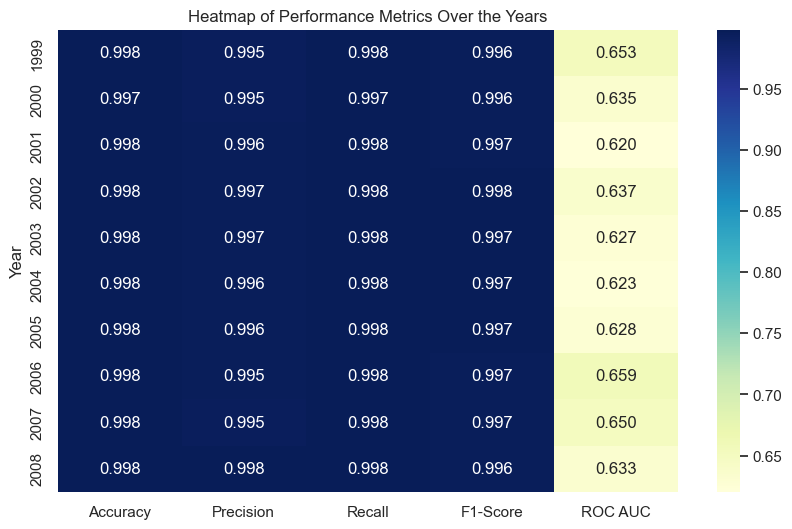

<Figure size 640x480 with 0 Axes>

In [76]:
# Selecting a subset of metrics to plot
metrics = metrics_df[['Year', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC']]
metrics.set_index('Year', inplace=True)

plt.figure(figsize=(10, 6))
sns.heatmap(metrics, annot=True, cmap="YlGnBu", fmt=".3f")
plt.title('Heatmap of Performance Metrics Over the Years')
plt.show()
plt.savefig('metricsheatmap.png', dpi= 300)

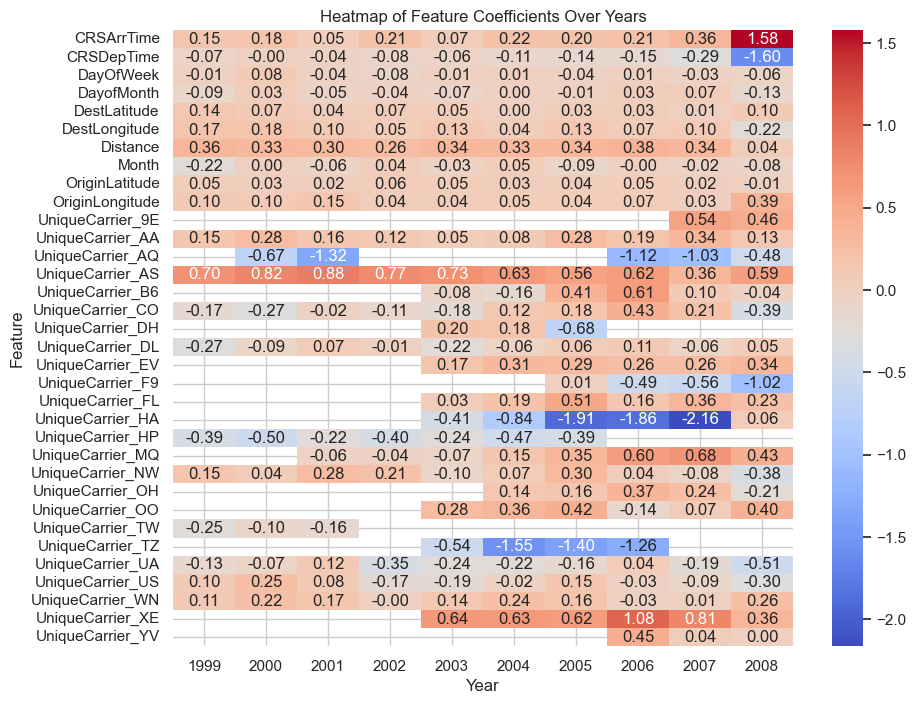

In [80]:
pivot_df = coefficients_df.pivot(index='Feature', columns='Year', values='Coefficient')

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Feature Coefficients Over Years')

# Save the plot before displaying it
plt.savefig('Coefficients_Heatmap.png', dpi=300)

# Display the plot
plt.show()

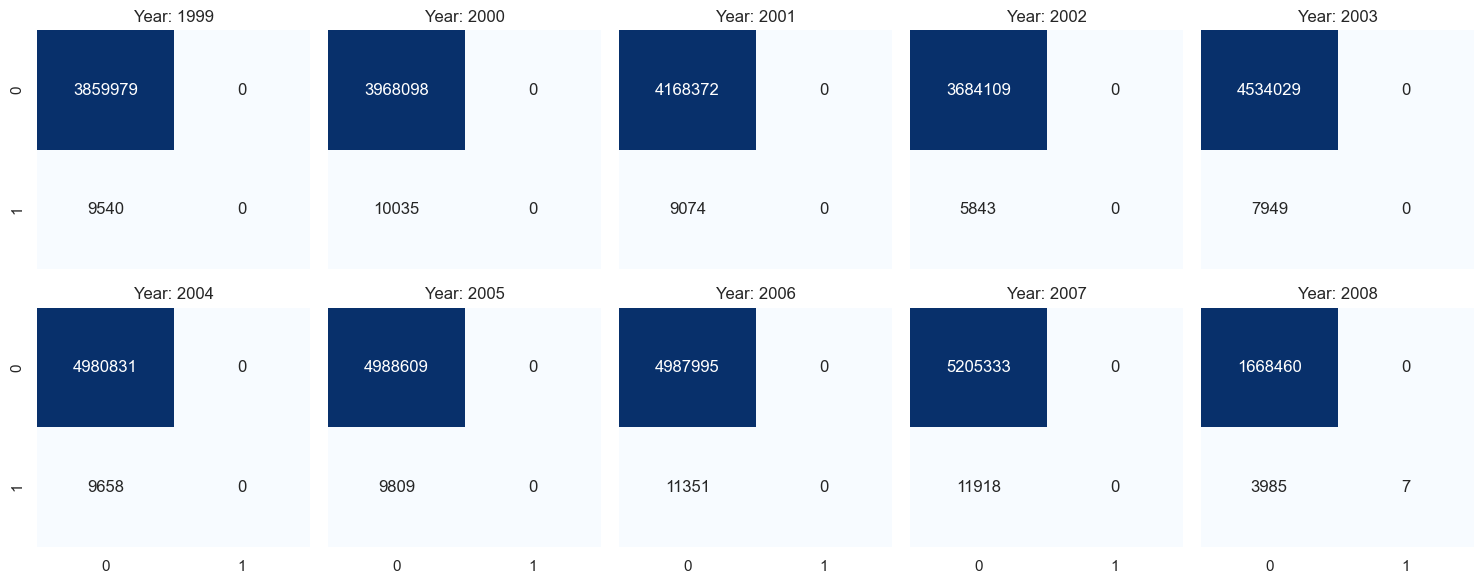

<Figure size 640x480 with 0 Axes>

In [78]:
def plot_confusion_matrix(data, **kwargs):
    # Create a 2x2 confusion matrix array correctly
    matrix = np.array([[data['TN'].values[0], data['FP'].values[0]], 
                       [data['FN'].values[0], data['TP'].values[0]]])
    # Use seaborn to plot the heatmap
    sns.heatmap(matrix, annot=True, fmt="d", cbar=False, cmap='Blues', ax=plt.gca())
    plt.title(f'Year: {data["Year"].values[0]}')  # Using .values[0] to get the scalar value

# Set up the FacetGrid
g = sns.FacetGrid(metrics_df, col="Year", col_wrap=5, height=3, aspect=1)
# Apply the plotting function to each subplot in the grid
g.map_dataframe(plot_confusion_matrix)
plt.show()
plt.savefig('CM.png', dpi= 300)

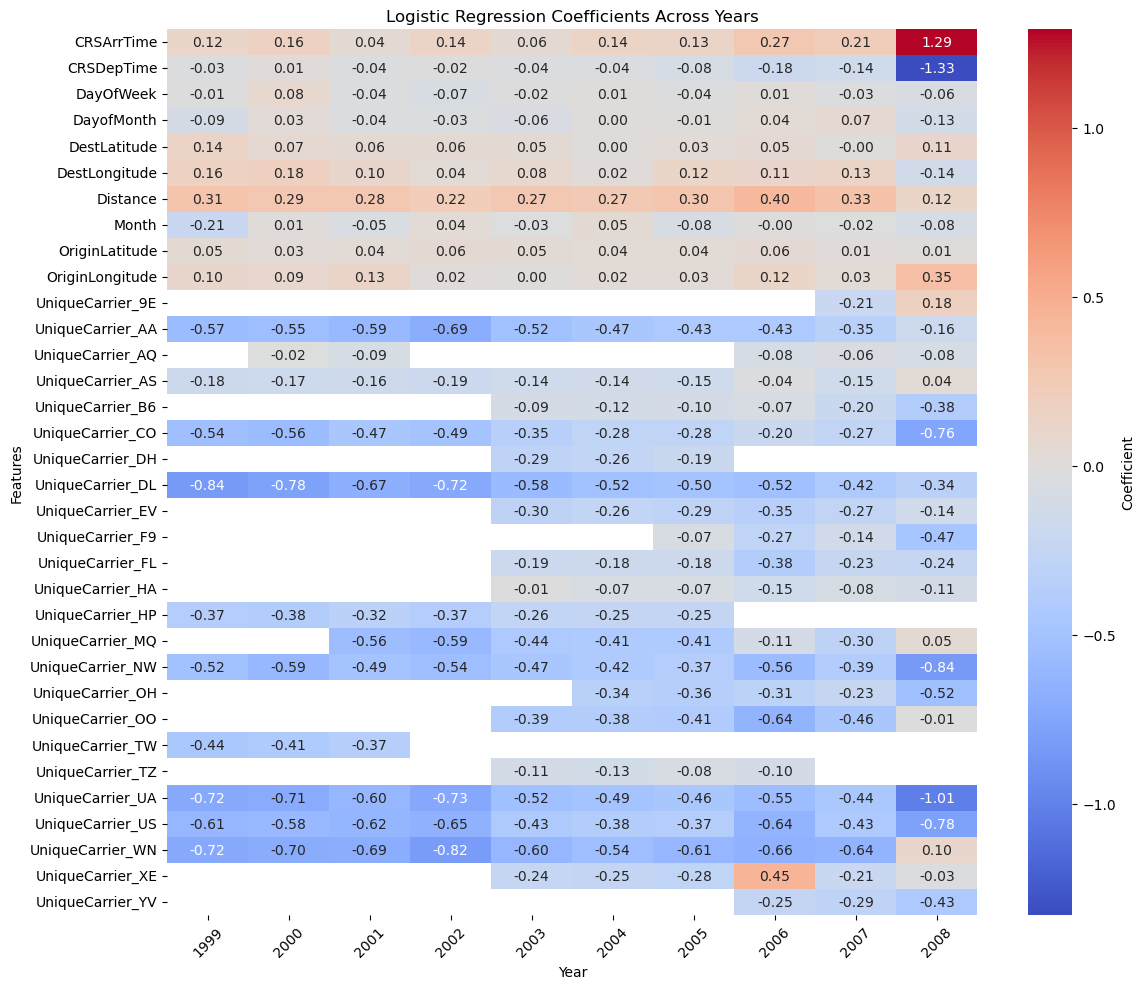

In [20]:
# First, we need to pivot the coefficients DataFrame
# Ensure that the 'Feature' column is of type string if it's categorical
coefficients_df['Feature'] = coefficients_df['Feature'].astype(str)
pivot_df = coefficients_df.pivot_table(index='Feature', columns='Year', values='Coefficient', aggfunc='mean')

# Now create the heatmap
mask = pivot_df.isnull()
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_df, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Coefficient'})
plt.title('Logistic Regression Coefficients Across Years')
plt.xlabel('Year')
plt.ylabel('Features')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability if necessary
plt.yticks(rotation=0)   # Ensure y-axis labels are horizontal for readability
plt.tight_layout()       # Adjust the layout
plt.show()

In [65]:
# We try a balanced model to see if there will be any difference
# Initialize DataFrames to store metrics and coefficients for the balanced model
balanced_metrics_df = pd.DataFrame()
balanced_coefficients_df = pd.DataFrame()

# Loop through each year's data and apply the logistic regression model with class weights
for year in range(1999, 2009):
    # Access the data for the current year
    df_year = globals()[f'data_{year}']
    
    # Define features and target
    features = ['Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime', 'CRSArrTime', 'Distance', 'OriginLatitude', 'OriginLongitude', 'DestLatitude', 'DestLongitude']
    target = 'Diverted'
    
    # Define the preprocessing steps
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), features),
            ('cat', OneHotEncoder(), ['UniqueCarrier']),
        ])
    
    # Initialize the logistic regression model with class weights
    balanced_model = LogisticRegression(class_weight='balanced', max_iter=1000)
    
    # Create a pipeline with preprocessing and model
    balanced_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', balanced_model)
    ])
    
    # Split into features and target
    X = df_year[features + ['UniqueCarrier']]
    y = df_year[target]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)
    
    # Fit the pipeline to the training data
    balanced_pipeline.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = balanced_pipeline.predict(X_test)
    y_proba = balanced_pipeline.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    balanced_accuracy = accuracy_score(y_test, y_pred)
    balanced_roc_auc = roc_auc_score(y_test, y_proba)
    balanced_conf_mat = confusion_matrix(y_test, y_pred)
    balanced_report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    
    # Append metrics to balanced_metrics_df
    new_balanced_metrics = pd.DataFrame({
        'Year': [year],
        'Accuracy': [balanced_accuracy],
        'ROC AUC': [balanced_roc_auc],
        'TN': [balanced_conf_mat[0, 0]],
        'FP': [balanced_conf_mat[0, 1]],
        'FN': [balanced_conf_mat[1, 0]],
        'TP': [balanced_conf_mat[1, 1]],
        'Precision': [balanced_report['weighted avg']['precision']],
        'Recall': [balanced_report['weighted avg']['recall']],
        'F1-Score': [balanced_report['weighted avg']['f1-score']],
        'Support': [balanced_report['weighted avg']['support']]
    })
    balanced_metrics_df = pd.concat([balanced_metrics_df, new_balanced_metrics], ignore_index=True)
    
    # Get and store coefficients
    balanced_coefs = balanced_pipeline.named_steps['classifier'].coef_[0]
    balanced_feature_names = features + list(balanced_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(['UniqueCarrier']))
    
    # Append coefficients to balanced_coefficients_df
    new_balanced_coefs = pd.DataFrame({
        'Year': [year] * len(balanced_coefs),
        'Feature': balanced_feature_names,
        'Coefficient': balanced_coefs
    })
    balanced_coefficients_df = pd.concat([balanced_coefficients_df, new_balanced_coefs], ignore_index=True)

    print(f"Year: {year}, Accuracy: {accuracy:.2f}, ROC AUC: {roc_auc:.2f}")
    print(f"Confusion Matrix:\n{conf_mat}")

In [66]:
balanced_coefficients_df

,Year,Feature,Coefficient
0,1999,Month,-0.215931
1,1999,DayofMonth,-0.083679
2,1999,DayOfWeek,-0.020496
3,1999,CRSDepTime,-0.035362
4,1999,CRSArrTime,0.115656
...,...,...,...
255,2008,UniqueCarrier_UA,-0.481564
256,2008,UniqueCarrier_US,-0.427619
257,2008,UniqueCarrier_WN,0.304227
258,2008,UniqueCarrier_XE,0.437813


In [67]:
balanced_metrics_df

,Year,Accuracy,ROC AUC,TN,FP,FN,TP,Precision,Recall,F1-Score,Support
0,1999,0.606091,0.654482,2339313,1520666,3572,5968,0.996023,0.606091,0.752428,3869519.0
1,2000,0.590981,0.636071,2344888,1623210,3923,6112,0.995821,0.590981,0.740562,3978133.0
2,2001,0.591771,0.622743,2466769,1701603,3750,5324,0.996320,0.591771,0.741526,4177446.0
3,2002,0.627362,0.639719,2311512,1372597,2420,3423,0.997376,0.627362,0.769543,3689952.0
4,2003,0.631245,0.628607,2862670,1671359,3517,4432,0.997030,0.631245,0.772327,4541978.0
5,2004,0.631239,0.624846,3144890,1835941,4359,5299,0.996689,0.631239,0.772157,4990489.0
6,2005,0.603439,0.630591,3010442,1978167,4011,5798,0.996715,0.603439,0.750858,4998418.0
7,2006,0.632095,0.661708,3153204,1834791,4494,6857,0.996318,0.632095,0.772461,4999346.0
8,2007,0.618686,0.657537,3220532,1984801,4612,7306,0.996297,0.618686,0.762293,5217251.0
9,2008,0.611476,0.645835,1020263,648197,1591,2401,0.996069,0.611476,0.756678,1672452.0


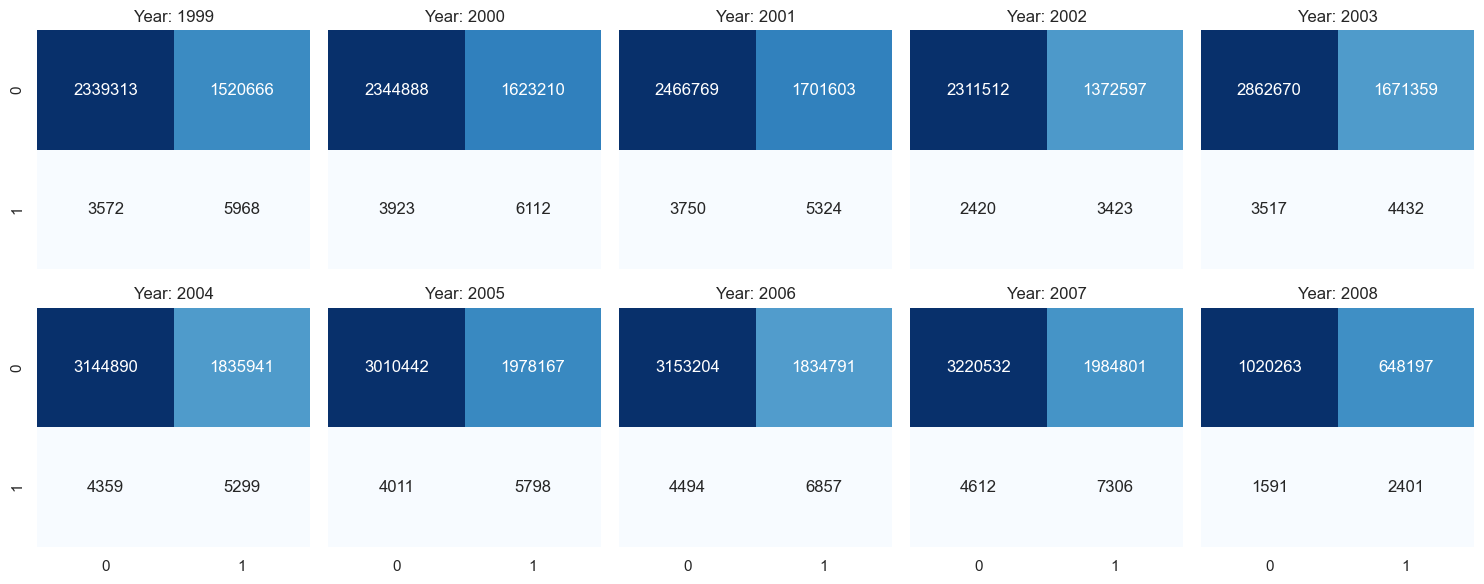

In [68]:
def plot_confusion_matrix(data, **kwargs):
    # Create a 2x2 confusion matrix array correctly
    matrix = np.array([[data['TN'].values[0], data['FP'].values[0]], 
                       [data['FN'].values[0], data['TP'].values[0]]])
    # Use seaborn to plot the heatmap
    sns.heatmap(matrix, annot=True, fmt="d", cbar=False, cmap='Blues', ax=plt.gca())
    plt.title(f'Year: {data["Year"].values[0]}')  # Using .values[0] to get the scalar value

# Set up the FacetGrid
g = sns.FacetGrid(balanced_metrics_df, col="Year", col_wrap=5, height=3, aspect=1)
# Apply the plotting function to each subplot in the grid
g.map_dataframe(plot_confusion_matrix)
plt.show()

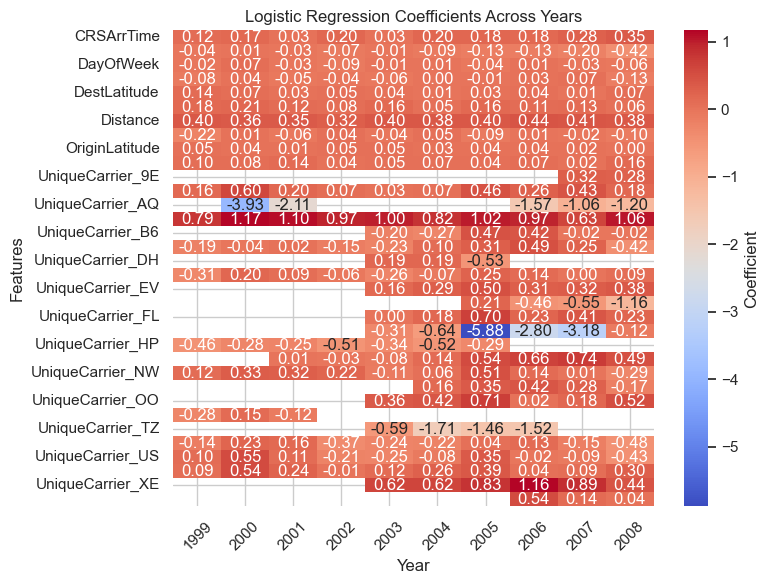

In [82]:
# First, we need to pivot the coefficients DataFrame
# Ensure that the 'Feature' column is of type string if it's categorical
balanced_coefficients_df['Feature'] = balanced_coefficients_df['Feature'].astype(str)
pivot_df = balanced_coefficients_df.pivot_table(index='Feature', columns='Year', values='Coefficient', aggfunc='mean')

# Now create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_df, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Coefficient'})
plt.title('Logistic Regression Coefficients Across Years')
plt.xlabel('Year')
plt.ylabel('Features')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability if necessary
plt.yticks(rotation=0)   # Ensure y-axis labels are horizontal for readability
plt.tight_layout()       # Adjust the layout
plt.show()

In [29]:
numerical_features = ['Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime', 'CRSArrTime', 'Distance', 'OriginLatitude', 'OriginLongitude', 'DestLatitude', 'DestLongitude']
categorical_features = ['UniqueCarrier']

# Initialize empty DataFrames for storing metrics and coefficients
metrics_df = pd.DataFrame()
coefficients_df = pd.DataFrame()

# Loop through each year's data
for year in range(1999, 2009):
    df_year = globals()[f'data_{year}']
    target = 'Diverted'

    # Define the preprocessing and SMOTE steps
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ])

    # Initialize the logistic regression model
    model = LogisticRegression(max_iter=1000, solver='liblinear')  # liblinear is often better for binary classification

    # Create an imbalanced-learn pipeline with preprocessing, SMOTE, and the classifier
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),  # Add SMOTE for over-sampling
        ('classifier', model)
    ])

    # Prepare features and target
    X = df_year[numerical_features + categorical_features]
    y = df_year[target]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

    # Fit the pipeline to the training data
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate and store metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1])
    conf_mat = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

    new_metrics = pd.DataFrame({
        'Year': [year],
        'Accuracy': [accuracy],
        'ROC AUC': [roc_auc],
        'TN': [conf_mat[0, 0]],
        'FP': [conf_mat[0, 1]],
        'FN': [conf_mat[1, 0]],
        'TP': [conf_mat[1, 1]],
        'Precision': [report['weighted avg']['precision']],
        'Recall': [report['weighted avg']['recall']],
        'F1-Score': [report['weighted avg']['f1-score']],
        'Support': [report['weighted avg']['support']]
    })
    metrics_df = pd.concat([metrics_df, new_metrics], ignore_index=True)

    # Get and store coefficients
    coefs = pipeline.named_steps['classifier'].coef_[0]
    feature_names = numerical_features + list(pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features))
    new_coefs = pd.DataFrame({
        'Year': year,
        'Feature': feature_names,
        'Coefficient': coefs
    })
    coefficients_df = pd.concat([coefficients_df, new_coefs], ignore_index=True)
    
    print(f"Year: {year}, Accuracy: {accuracy:.2f}, ROC AUC: {roc_auc:.2f}")
    print(f"Confusion Matrix:\n{conf_mat}")


Year: 1999, Accuracy: 0.60, ROC AUC: 0.65
Confusion Matrix:
[[2328992 1530987]
 [   3585    5955]]
Year: 2000, Accuracy: 0.59, ROC AUC: 0.63
Confusion Matrix:
[[2340999 1627099]
 [   3954    6081]]
Year: 2001, Accuracy: 0.58, ROC AUC: 0.62
Confusion Matrix:
[[2413904 1754468]
 [   3699    5375]]
Year: 2002, Accuracy: 0.62, ROC AUC: 0.64
Confusion Matrix:
[[2289459 1394650]
 [   2410    3433]]
Year: 2003, Accuracy: 0.63, ROC AUC: 0.63
Confusion Matrix:
[[2843919 1690110]
 [   3516    4433]]
Year: 2004, Accuracy: 0.63, ROC AUC: 0.62
Confusion Matrix:
[[3116341 1864490]
 [   4322    5336]]
Year: 2005, Accuracy: 0.60, ROC AUC: 0.63
Confusion Matrix:
[[2975862 2012747]
 [   3964    5845]]
Year: 2006, Accuracy: 0.64, ROC AUC: 0.66
Confusion Matrix:
[[3184843 1803152]
 [   4655    6696]]
Year: 2007, Accuracy: 0.62, ROC AUC: 0.66
Confusion Matrix:
[[3213062 1992271]
 [   4644    7274]]
Year: 2008, Accuracy: 0.60, ROC AUC: 0.64
Confusion Matrix:
[[1007130  661330]
 [   1569    2423]]


In [30]:
metrics_df

,Year,Accuracy,ROC AUC,TN,FP,FN,TP,Precision,Recall,F1-Score,Support
0,1999,0.603420,0.653000,2328992,1530987,3585,5955,0.996011,0.603420,0.750355,3869519.0
1,2000,0.589995,0.634662,2340999,1627099,3954,6081,0.995805,0.589995,0.739786,3978133.0
2,2001,0.579129,0.618970,2413904,1754468,3699,5375,0.996308,0.579129,0.731465,4177446.0
3,2002,0.621388,0.637793,2289459,1394650,2410,3433,0.997371,0.621388,0.765015,3689952.0
4,2003,0.627117,0.627635,2843919,1690110,3516,4433,0.997022,0.627117,0.769217,4541978.0
5,2004,0.625525,0.622849,3116341,1864490,4322,5336,0.996688,0.625525,0.767847,4990489.0
6,2005,0.596530,0.628329,2975862,2012747,3964,5845,0.996716,0.596530,0.745458,4998418.0
7,2006,0.638391,0.660878,3184843,1803152,4655,6696,0.996282,0.638391,0.777177,4999346.0
8,2007,0.617248,0.655082,3213062,1992271,4644,7274,0.996284,0.617248,0.761196,5217251.0
9,2008,0.603636,0.641904,1007130,661330,1569,2423,0.996070,0.603636,0.750609,1672452.0


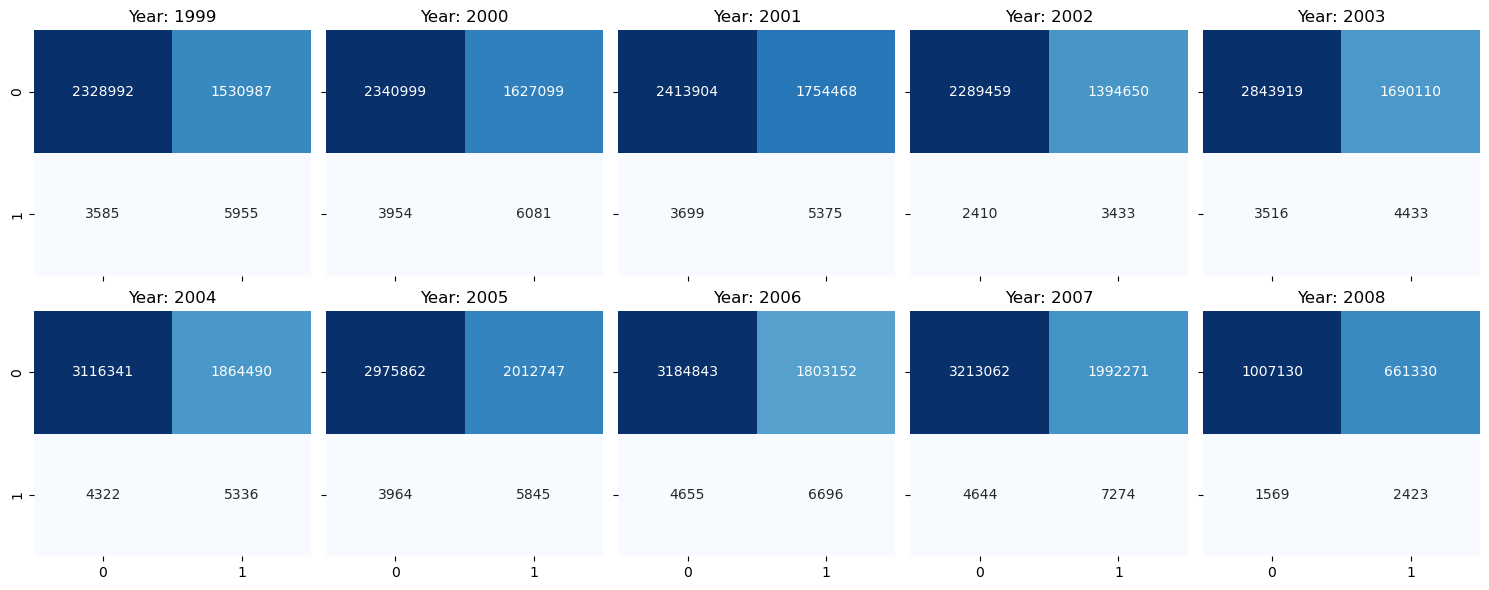

In [32]:
def plot_confusion_matrix(data, **kwargs):
    # Create a 2x2 confusion matrix array correctly
    matrix = np.array([[data['TN'].values[0], data['FP'].values[0]], 
                       [data['FN'].values[0], data['TP'].values[0]]])
    # Use seaborn to plot the heatmap
    sns.heatmap(matrix, annot=True, fmt="d", cbar=False, cmap='Blues', ax=plt.gca())
    plt.title(f'Year: {data["Year"].values[0]}')  # Using .values[0] to get the scalar value

# Set up the FacetGrid
g = sns.FacetGrid(metrics_df, col="Year", col_wrap=5, height=3, aspect=1)
# Apply the plotting function to each subplot in the grid
g.map_dataframe(plot_confusion_matrix)
plt.show()